In [1]:
from azureml.core import Workspace, Dataset

# Connect to the current workspace
ws = Workspace.from_config()

# List all available datasets to confirm yours is registered
for dataset_name in Dataset.get_all(ws):
    print(dataset_name)

shipments_significant_delay_2025
shipments_cleaned_2025h1
neuverra_support_docs
neuverra_monthly_summary


In [2]:
from azureml.core.dataset import Dataset

# Load dataset by name
dataset = Dataset.get_by_name(workspace=ws, name='neuverra_monthly_summary')

# Convert to pandas DataFrame
df = dataset.to_pandas_dataframe()

# Preview the data
df.head()

AttributeError: 'FileDataset' object has no attribute 'to_pandas_dataframe'

In [3]:
from azureml.core.dataset import Dataset

# Load dataset
dataset = Dataset.get_by_name(workspace=ws, name='neuverra_monthly_summary')

# Convert FileDataset to pandas DataFrame
df = dataset.download(target_path='.', overwrite=True)[0]
import pandas as pd
df = pd.read_csv(df)

# Preview the data
df.head()


{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False', 'activity': 'download', 'activityApp': 'FileDataset'}


,year_month,total_revenue,avg_quantity_per_order,return_rate,total_conversions,total_impressions
0,2024-04,73429.54,3.075342,0.089041,14159.0,17529.0
1,2024-05,349104.64,3.053748,0.090523,122071.0,143182.0
2,2024-06,343290.07,3.054332,0.101322,61588.0,71258.0
3,2024-07,367933.36,2.916329,0.090418,152241.0,179289.0
4,2024-08,358432.96,2.984786,0.078838,168516.0,195599.0


In [4]:
# Basic DataFrame info
df.info()

# Summary statistics
df.describe()

# Nulls check
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year_month              13 non-null     object 
 1   total_revenue           13 non-null     float64
 2   avg_quantity_per_order  13 non-null     float64
 3   return_rate             13 non-null     float64
 4   total_conversions       13 non-null     float64
 5   total_impressions       13 non-null     float64
dtypes: float64(5), object(1)
memory usage: 752.0+ bytes


year_month                0
total_revenue             0
avg_quantity_per_order    0
return_rate               0
total_conversions         0
total_impressions         0
dtype: int64

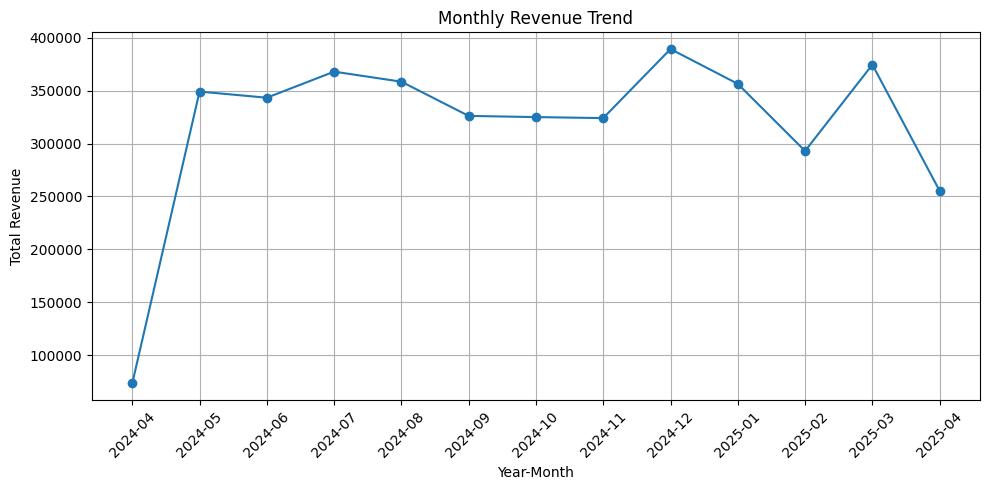

In [5]:
import matplotlib.pyplot as plt

# Plot revenue trend over time
plt.figure(figsize=(10, 5))
plt.plot(df['year_month'], df['total_revenue'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

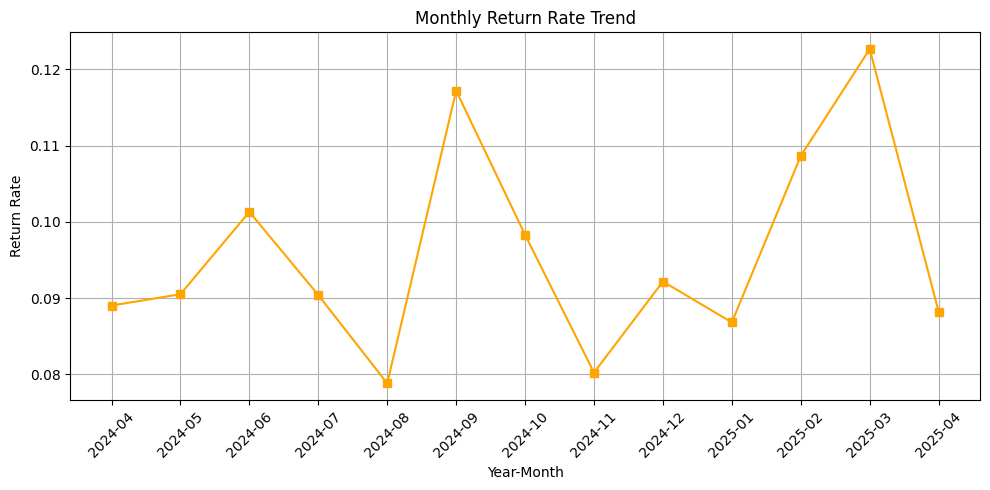

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(df['year_month'], df['return_rate'], marker='s', color='orange')
plt.title('Monthly Return Rate Trend')
plt.xlabel('Year-Month')
plt.ylabel('Return Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

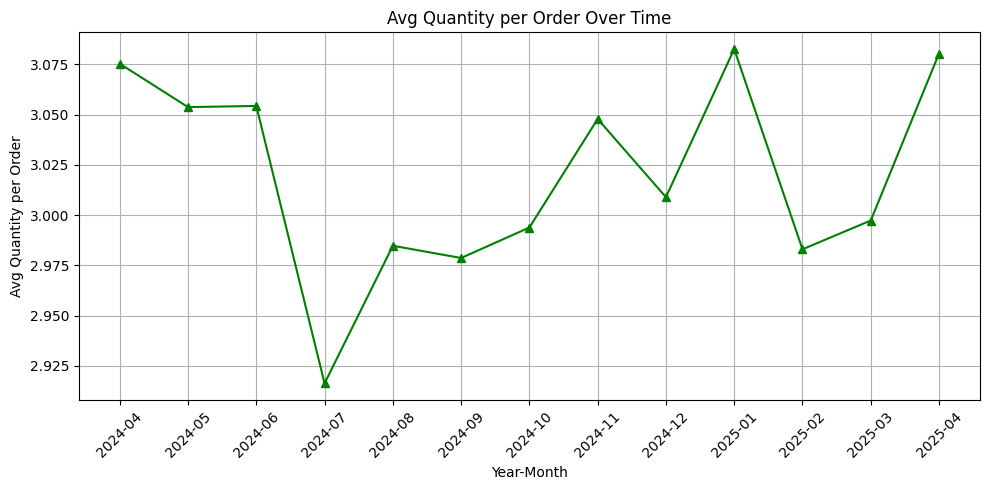

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df['year_month'], df['avg_quantity_per_order'], marker='^', color='green')
plt.title('Avg Quantity per Order Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Avg Quantity per Order')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

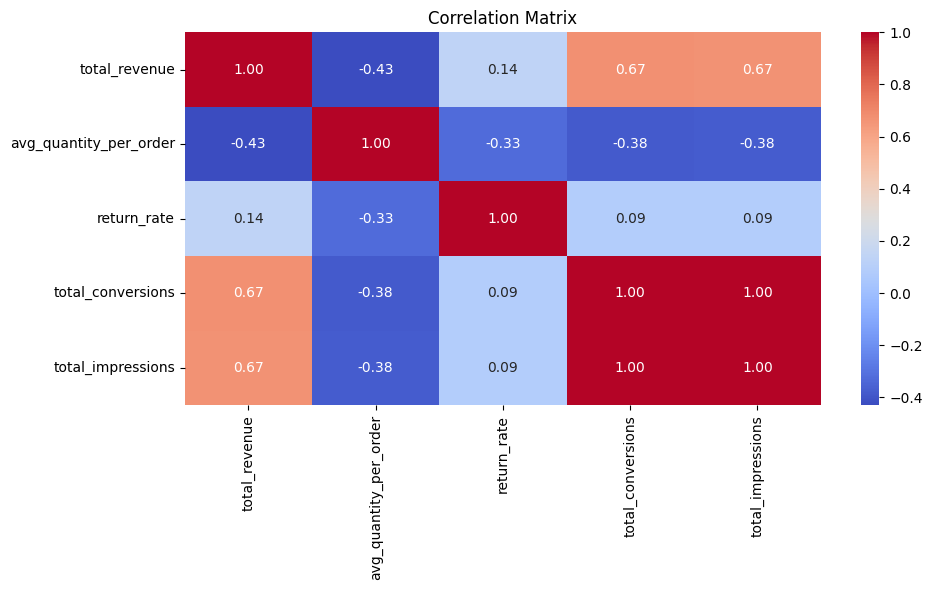

In [8]:
import seaborn as sns

# Correlation matrix for all numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [9]:
# Best and worst months by revenue
print("Top Revenue Month:\n", df.loc[df['total_revenue'].idxmax()])
print("\nLowest Revenue Month:\n", df.loc[df['total_revenue'].idxmin()])


Top Revenue Month:
 year_month                  2024-12
total_revenue             389280.38
avg_quantity_per_order     3.008963
return_rate                 0.09219
total_conversions          104695.0
total_impressions          121566.0
Name: 8, dtype: object

Lowest Revenue Month:
 year_month                 2024-04
total_revenue             73429.54
avg_quantity_per_order    3.075342
return_rate               0.089041
total_conversions          14159.0
total_impressions          17529.0
Name: 0, dtype: object


In [11]:
df['conversion_rate'] = df['total_conversions'] / df['total_impressions']


In [12]:
ggplot(data, aes(x = year_month, y = total_revenue)) +
  geom_line() +
  ggtitle("Monthly Revenue Trend") +
  theme_minimal()


SyntaxError: invalid syntax (1974700265.py, line 1)

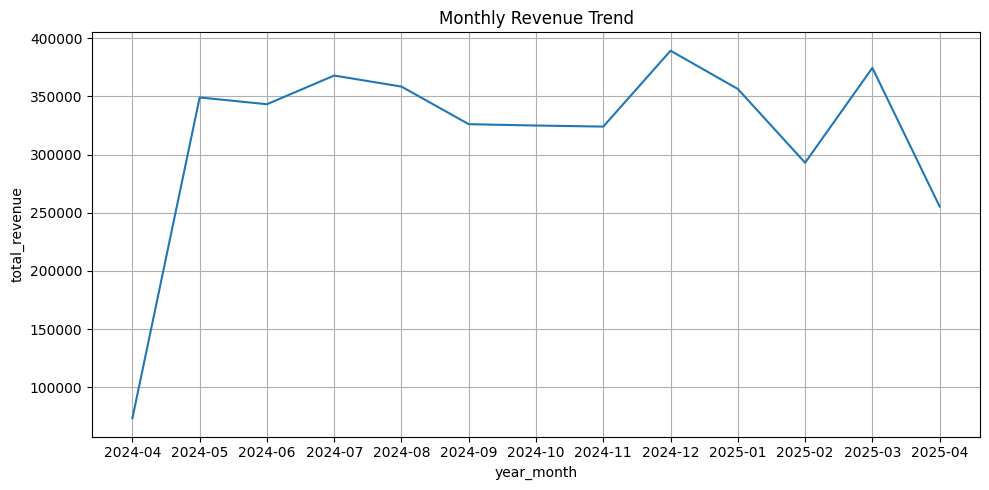

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year_month', y='total_revenue')
plt.title("Monthly Revenue Trend")
plt.grid(True)
plt.tight_layout()
plt.show()

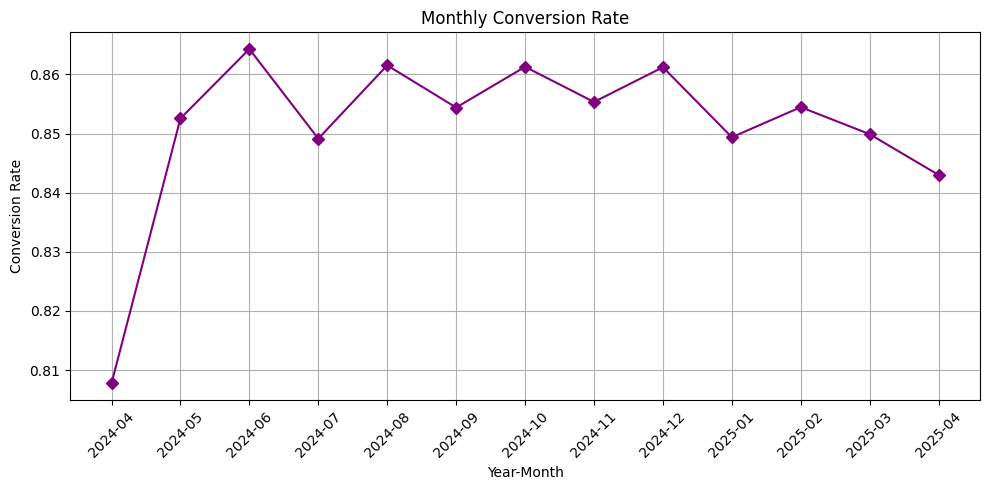

In [14]:
# Create new column for conversion rate
df['conversion_rate'] = df['total_conversions'] / df['total_impressions']

# Plot Monthly Conversion Rate
plt.figure(figsize=(10, 5))
plt.plot(df['year_month'], df['conversion_rate'], marker='D', color='purple')
plt.title('Monthly Conversion Rate')
plt.xlabel('Year-Month')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Group revenue by product category
category_revenue = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='teal')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

KeyError: 'product_category'

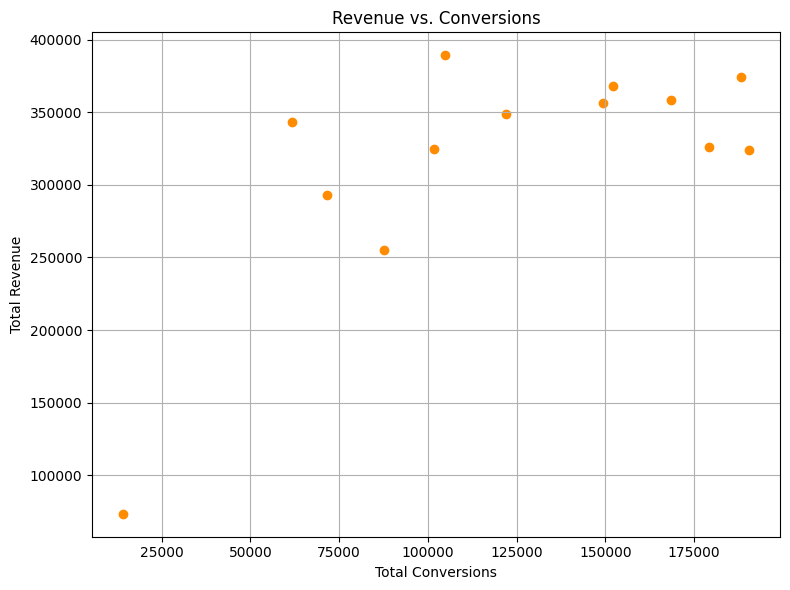

In [16]:
# Scatter plot: Revenue vs. Conversions
plt.figure(figsize=(8, 6))
plt.scatter(df['total_conversions'], df['total_revenue'], color='darkorange')
plt.title('Revenue vs. Conversions')
plt.xlabel('Total Conversions')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

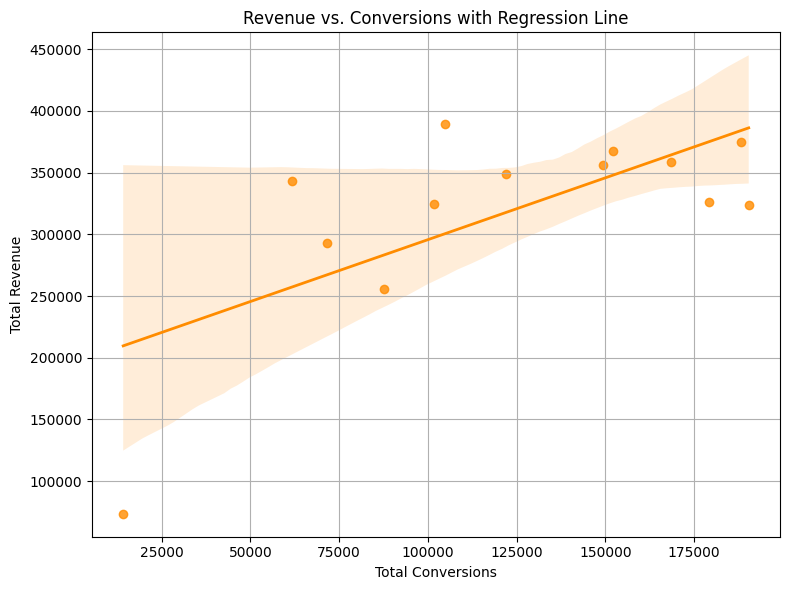

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot: Revenue vs. Conversions
plt.figure(figsize=(8, 6))
sns.regplot(x='total_conversions', y='total_revenue', data=df, color='darkorange', line_kws={"linewidth": 2})
plt.title('Revenue vs. Conversions with Regression Line')
plt.xlabel('Total Conversions')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

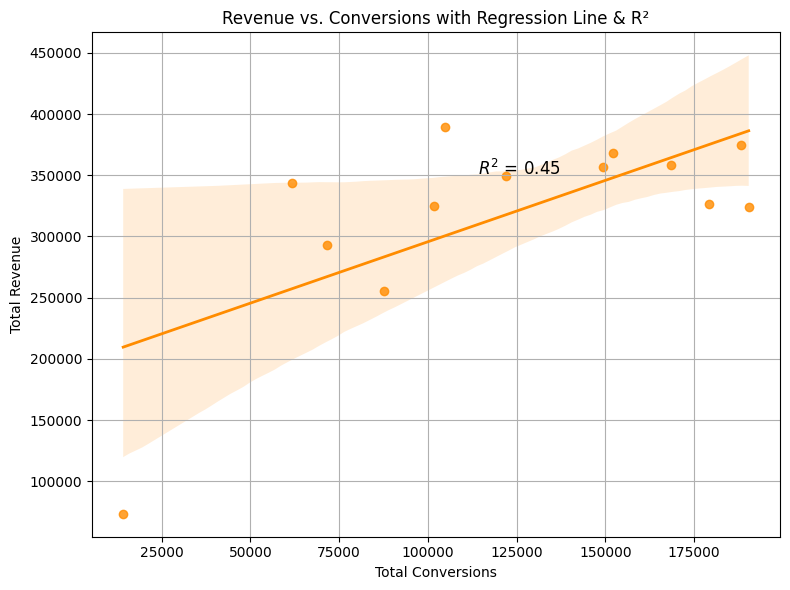

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = df[['total_conversions']].values
y = df['total_revenue'].values

# Fit regression model
model = LinearRegression()
model.fit(X, y)
r_squared = model.score(X, y)

# Create regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x='total_conversions', y='total_revenue', data=df, color='darkorange', line_kws={"linewidth": 2})

# Add R² annotation
plt.text(x=X.max()*0.6, y=y.max()*0.9, s=f"$R^2$ = {r_squared:.2f}", fontsize=12, color='black')

# Labeling
plt.title('Revenue vs. Conversions with Regression Line & R²')
plt.xlabel('Total Conversions')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()